In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [ ]:
market = pd.read_csv('marketplace.csv', sep=',', index_col=0)
market.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


banyak observasi dan variabel

In [ ]:
market.shape

(26014, 15)

nilai dengan duplicate

In [ ]:
dup = market.duplicated()
print(dup.sum())
market[dup]

2220


,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
4/25/2020,oppo A9 2020 ram 8/128gb garansi resmi,E5,12.0,RM,Oppo A9,Kota Administrasi Jakarta Utara,False,4100000,999959,0,0,1,98,29,45
4/19/2020,[NEW] Oppo A9 2020 8/128 GB Garansi Resmi RAM ...,E7,16.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,3575000,840,0,0,14,94,119,261
4/26/2020,hp Oppo a9 2020,F5,17.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,4000000,9925,0,0,3,100,32,75
4/28/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
4/29/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/17/2020,XIAOMI REDMI NOTE 7 RAM 4GB INTERNAL 64GB 4/64...,D2319,829.0,OS,Xiaomi Redmi Note 7,Kota Administrasi Jakarta Barat,False,2650000,7,0,0,6,99,91,141
4/4/2020,XIAOMI REDMI NOTE 8 Pro NOTE8 6GB 128GB 6 128 ...,F339,4239.0,OS,Xiaomi Redmi Note 6 Pro,Kota Administrasi Jakarta Barat,False,3699000,76,0,0,11,100,8,24
4/7/2020,Asus Zenfone 3 Max ZC520TL - 4G LTE - 2GB/32GB...,A287,843.0,OS,Asus Zenfone 3 Max ZC520TL,Kota Administrasi Jakarta Pusat,False,1580000,7,0,0,25,100,6,8


nilai tanpa duplicate

In [ ]:
dup.isnull().sum()

0

Cek type data

In [ ]:
market.dtypes

sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

mengubah tipe data

In [ ]:
market[['merchant_code']]=market[['merchant_code']].astype('Int64')

In [ ]:
market.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4/15/2020,nokia 3310 reborn,C1,5,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


Apakah ada nilai dalam variabel yang nol? Yang mana Jika ada beberapa variabel null pada dataset tersebut, silahkan isi nilainya dengan 0.


In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26014 entries, 3/11/2020 to 4/11/2020
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sku_name        26014 non-null  object
 1   product_id      26014 non-null  object
 2   merchant_code   26007 non-null  Int64 
 3   merchant_badge  26014 non-null  object
 4   product_type    26014 non-null  object
 5   merchant_city   26014 non-null  object
 6   cod             26014 non-null  bool  
 7   price           26014 non-null  int64 
 8   stock           26014 non-null  int64 
 9   daily_gmv       26014 non-null  int64 
 10  daily_sold      26014 non-null  int64 
 11  daily_view      26014 non-null  int64 
 12  rating          26014 non-null  int64 
 13  total_review    26014 non-null  int64 
 14  total_sold      26014 non-null  int64 
dtypes: Int64(1), bool(1), int64(8), object(5)
memory usage: 3.7+ MB


In [ ]:
market.isnull().sum()

sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode

In [ ]:
market["merchant_code"]=market["merchant_code"].fillna((0))

In [ ]:
market.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

cek produk category

In [ ]:
market["product_type"].value_counts()

Realme 6                          2161
Samsung Galaxy A10s               1062
Xiaomi Redmi Note 8               1025
Xiaomi Redmi 7A                    860
Xiaomi Redmi 6A                    747
                                  ... 
Asus ZenFone Lite (L1) ZA551KL       1
Xiaomi Mi 8 Explorer                 1
Infinix Hot S                        1
Huawei P10 Plus                      1
Samsung Galaxy S5 Neo                1
Name: product_type, Length: 361, dtype: int64

Jenis produk apa yang termasuk dalam 3 produk teratas dalam penjualan?

In [ ]:
market["product_type"].value_counts().head(3)

Realme 6               2161
Samsung Galaxy A10s    1062
Xiaomi Redmi Note 8    1025
Name: product_type, dtype: int64

Berdasarkan produk teratas pertama. Berapa harga rata-rata, dan seberapa bervariasinya harga jual? dan menampilkan visualisasi distribusi harga dengan histogram.


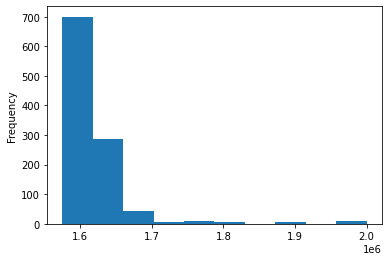

In [ ]:
market[market["product_type"]=="Samsung Galaxy A10s"]["price"].plot(kind="hist")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


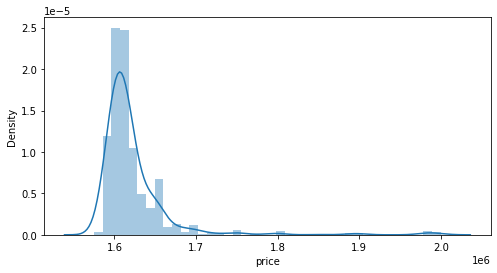

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(market[market["product_type"]=="Samsung Galaxy A10s"]["price"], bins=40)

In [ ]:
df=market.groupby("product_type")['price'].mean().sort_values(ascending=False)
print(df.loc[["Samsung Galaxy A10s"]])

product_type
Samsung Galaxy A10s    1.622651e+06
Name: price, dtype: float64


Filter dataset hanya dengan 'Samsung Galaxy A10s', dan temukan 3 kota pedagang terlaris. Tunjukkan dengan beberapa boxplot distribusi harga antara kota pedagang 3 teratas itu!


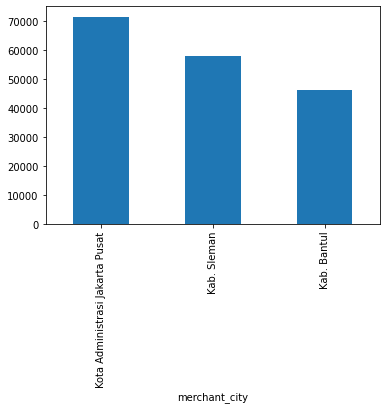

In [ ]:
a=market[market["product_type"]=="Samsung Galaxy A10s"]
a.groupby("merchant_city")['total_sold'].sum().sort_values(ascending=False).head(3).plot(kind="bar")

In [ ]:
a.groupby("merchant_city")['total_sold'].sum().sort_values(ascending=False).head(3)

merchant_city
Kota Administrasi Jakarta Pusat    71373
Kab. Sleman                        57790
Kab. Bantul                        46091
Name: total_sold, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


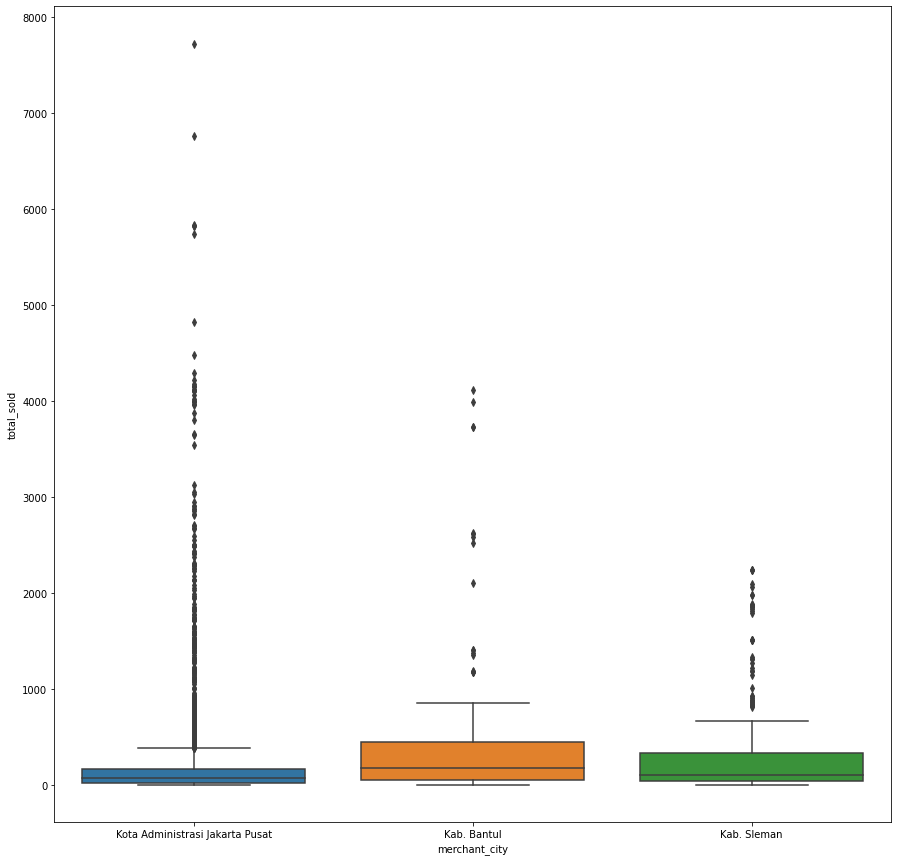

In [ ]:
city=['Kota Administrasi Jakarta Pusat','Kab. Sleman','Kab. Bantul']
b=market[market['merchant_city'].isin(city)]
plt.figure(figsize=(15,15))
boxplot=sns.boxplot(x="merchant_city", y="total_sold", data=b)
print(boxplot)


Ujilah perbedaan total_sold produk Samsung Galaxy A10s dengan Xiaomi Redmi 6A menggunakan t-sample test

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
samsung= market[market['product_type']=='Samsung Galaxy A10s']['total_sold']
xiaomi= market[market['product_type']=='Xiaomi Redmi 6A']['total_sold']

samsung_mean=np.mean(samsung)
xiaomi_mean=np.mean(xiaomi)

print("Rata - rata penjualan Samsung Galaxy A10s : ",samsung_mean)
print("Rata - rata penjualan Xiaomi Redmi 6A : ",xiaomi_mean)

samsung_std=np.std(samsung)
xiaomi_std=np.std(xiaomi)

print("Standard Deviasi Samsung Galaxy A10s : ",samsung_std)
print("Standard Deviasi Xiaomi Redmi 6A : ",xiaomi_std)

ttest,pval = ttest_ind(samsung,xiaomi)
print("p-value", pval)

Rata - rata penjualan Samsung Galaxy A10s :  495.1525423728813
Rata - rata penjualan Xiaomi Redmi 6A :  445.0147255689424
Standard Deviasi Samsung Galaxy A10s :  626.3434790554674
Standard Deviasi Xiaomi Redmi 6A :  580.394664272472
p-value 0.08442284533312362


Berikan kesimpulan dari jawaban yang telah didapatkan dari poin 1-8
